In [1]:
import pandas as pd
df = pd.read_csv('final_cleaned_cars_data.csv')

In [2]:
df.head()

,City,Body_Type,Ownerno,Company,Model,Modelyear,Centralvariantid,Variantname,Price,Registration_Year,...,Dual_Tone_Dashboard,Height_Adjustable_Driver_Seat,Fog_Lights_Rear,Leather_Seats,Apple_Car_Play,Roof_Carrier,Speed_Alert,Outside_Rear_View_Mirror_Turn_Indicators,Wifi_Connectivity,Age_Old_In_Year
0,chennai,SUV,1,Kia,Sonet,2022,8654,Turbo DCT,13.955273,2022,...,False,True,False,True,True,False,False,True,False,2
1,chennai,Minivans,1,Maruti,Eeco,2015,4025,7 Seater,12.936034,2015,...,False,False,False,False,False,False,False,False,False,9
2,chennai,SUV,1,Nissan,Magnite,2021,8135,Turbo XV,13.527828,2021,...,True,True,False,False,True,False,False,True,True,3
3,chennai,Hatchback,1,Hyundai,i10,2015,1579,Sportz,12.894207,2015,...,False,False,False,False,False,False,False,False,False,9
4,chennai,Hatchback,1,Honda,Jazz,2015,1341,1.2 VX,13.217674,2015,...,False,True,False,False,False,False,False,True,False,9


In [3]:
# Encoding the data
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce


df_copy = df.copy()
categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
encoder = ce.OneHotEncoder(cols=categorical_columns, use_cat_names=True)
df_copy = encoder.fit_transform(df_copy)

boolean_columns = df_copy.select_dtypes(include=['bool']).columns
label_encoder = LabelEncoder()
for column in boolean_columns:
    df_copy[column] = label_encoder.fit_transform(df_copy[column])

In [4]:
X = df_copy.drop(["Price"], axis=1)
Y = df_copy["Price"]

In [5]:
import statsmodels.regression.linear_model as sm
ols = sm.OLS(endog = Y, exog = X).fit()
p_values = ols.pvalues
# Filter the features where p-value < 0.05
features_above_0_05 = p_values[p_values < 0.05].index
# Print the list of features with p-value > 0.05
features_above_0_05_list = features_above_0_05.tolist()   
print("Features with p-value < 0.05:")
print(features_above_0_05_list)

Features with p-value < 0.05:
['City_chennai', 'City_bangalore', 'City_delhi', 'City_hyderabad', 'City_jaipur', 'City_kolkata', 'Body_Type_Minivans', 'Body_Type_MUV', 'Body_Type_Hybrids', 'Ownerno', 'Company_Maruti', 'Company_Nissan', 'Company_Hyundai', 'Company_Honda', 'Company_Mercedes-Benz', 'Company_BMW', 'Company_Ford', 'Company_Tata', 'Company_Toyota', 'Company_Audi', 'Company_Mahindra', 'Company_Renault', 'Company_Chevrolet', 'Company_Volkswagen', 'Company_Datsun', 'Company_Fiat', 'Company_Land Rover', 'Company_MG', 'Company_Isuzu', 'Company_Mini', 'Company_Volvo', 'Company_Jaguar', 'Company_Mahindra Renault', 'Company_Lexus', 'Company_Opel', 'Company_Porsche', 'Company_Hindustan Motors', 'Model_Sonet', 'Model_Eeco', 'Model_Magnite', 'Model_i10', 'Model_Celerio', 'Model_A-Star', 'Model_Swift', 'Model_Grand i10', 'Model_City', 'Model_Fortuner', 'Model_EON', 'Model_Baleno', 'Model_WR-V', 'Model_B Class', 'Model_Esteem', 'Model_KUV 100', 'Model_Grand i10 Nios', 'Model_Corolla Altis

In [6]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestRegressor

# Method 1: SelectKBest
selector = SelectKBest(score_func=f_classif, k=100)  # Select top 20 features
X_new = selector.fit_transform(X, Y)
selected_features = X.columns[selector.get_support()].tolist()
# Method 2: Random Forest Feature Importance
rf = RandomForestRegressor()
rf.fit(X, Y)
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = feature_importances.nlargest(100)
top_feature_names = top_features.index.tolist()    # Extract feature names as a list
print("SelectKBest Features")
print(selected_features)
print("Random Forest Features")
print(top_feature_names)

c:\Users\HOME\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


SelectKBest Features
['Body_Type_Coupe', 'Company_Lexus', 'Model_S-Class', 'Model_GLS', 'Model_Slavia', 'Model_3 Series Gran Limousine', 'Model_AMG GLA 35', 'Model_Discovery', 'Model_ES', 'Model_T-Roc', 'Model_X4', 'Model_X7', 'Model_A3 cabriolet', 'Model_Gloster', 'Model_Range Rover Sport', 'Model_Defender', 'Model_RX', 'Model_AMG G 63', 'Model_G', 'Model_Vellfire', 'Model_Land Cruiser 300', 'Model_Range Rover', 'Model_911', 'Model_AMG GT', 'Model_S5 Sportback', 'Model_F-TYPE', 'Modelyear', 'Variantname_xDrive30d M', 'Variantname_Exclusive', 'Variantname_S 350', 'Variantname_300d', 'Variantname_220d 4MATIC', 'Variantname_400d 4MATIC', 'Variantname_Luxury Line', 'Variantname_45 TFSI', 'Variantname_330 Li', 'Variantname_ZX MT', 'Variantname_DLE', 'Variantname_Z8L Diesel', 'Variantname_320Ld Luxury', 'Variantname_Technology', 'Variantname_220d 4M', 'Variantname_Progressive', 'Variantname_530i', 'Variantname_AMG E', 'Variantname_TSI', 'Variantname_M Sport', 'Variantname_350d', 'Variantnam

Encoding the Categorical Features

In [7]:
# Encoding the data
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce

important_features = [
    'City', 'Body_Type', 'Ownerno', 'Company', 'Model', 'Modelyear', 'Price', 'Registration_Year', 'Insurance_Validity', 'Fuel_Type', 'Variantname'
      'Seats', 'Kms_Driven', 'Transmission', 'Year_Of_Manufacture', 'Engine', 'Mileage','Age_Old_In_Year'
 ]

df_copy = df.copy()

drop_columns = [column for column in df_copy.columns if column not in important_features]
df_copy = df_copy.drop(columns=drop_columns)

# Encoding categorical columns
categorical_columns = [col for col in df_copy.columns if df_copy[col].dtype == 'object']
encoder = ce.OneHotEncoder(cols=categorical_columns, use_cat_names=True)
df_copy = encoder.fit_transform(df_copy)

In [8]:
df_copy.head()

,City_chennai,City_bangalore,City_delhi,City_hyderabad,City_jaipur,City_kolkata,Body_Type_SUV,Body_Type_Minivans,Body_Type_Hatchback,Body_Type_Sedan,...,Fuel_Type_Electric,Fuel_Type_CNG,Fuel_Type_LPG,Kms_Driven,Transmission_Automatic,Transmission_Manual,Year_Of_Manufacture,Engine,Mileage,Age_Old_In_Year
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,20000,1,0,2022,998,18.30,2
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,20687,0,1,2015,1196,15.37,9
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,30000,0,1,2021,999,20.00,3
3,1,0,0,0,0,0,0,0,1,0,...,0,0,0,59247,0,1,2015,1086,19.81,9
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,50000,0,1,2015,1199,18.70,9


In [9]:
X = df_copy.drop(["Price"], axis=1)
Y = df_copy["Price"]

In [10]:
# scaling the data with standardScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(X)

In [11]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


def best_ML_model(x,y,models):
        
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

        results = []

        for model in models:

                model=model().fit(x_train,y_train)
                y_pred=model.predict(x_test)
                MSE_1=mean_squared_error(y_test,y_pred)
                MAE_1=mean_absolute_error(y_test,y_pred)
                RMSE_1=np.sqrt(mean_squared_error(y_test,y_pred))
                r_squr_1=r2_score(y_test,y_pred)
                results.append({"model": type(model).__name__,
                                          "MAE": MAE_1,
                                          "MSE": MSE_1,
                                          "RMSE": RMSE_1,
                                           "R2": r_squr_1 })
                # Plot Actual vs Predicted Prices
                plt.figure(figsize=(10, 6))
                sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.6, 'color': 'orange'}, 
                            line_kws={'color': 'red', 'linewidth': 1.5})
                plt.xlabel('Actual Prices')
                plt.ylabel('Predicted Prices')
                plt.title(f'{type(model).__name__}: Actual vs Predicted Prices', fontsize=14)
                plt.show()
                print(f"Trainscore: {model.score(x_train, y_train)}")
                print(f"Testscore: {model.score(x_test, y_test)}")
        results_df = pd.DataFrame(results)
        
        return results_df 

Predicting Models for Selecting

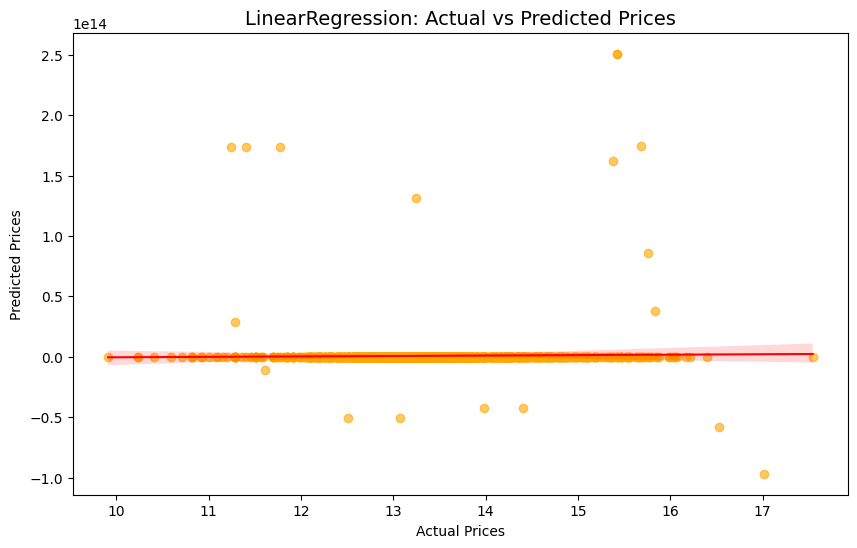

Trainscore: 0.9489391405532032
Testscore: -2.571360476706731e+26


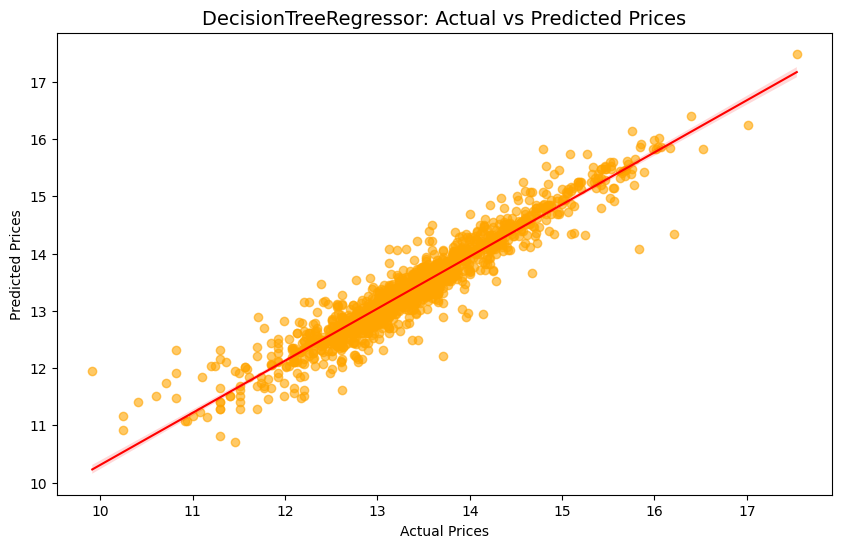

Trainscore: 0.9998200681554857
Testscore: 0.9024331935461366


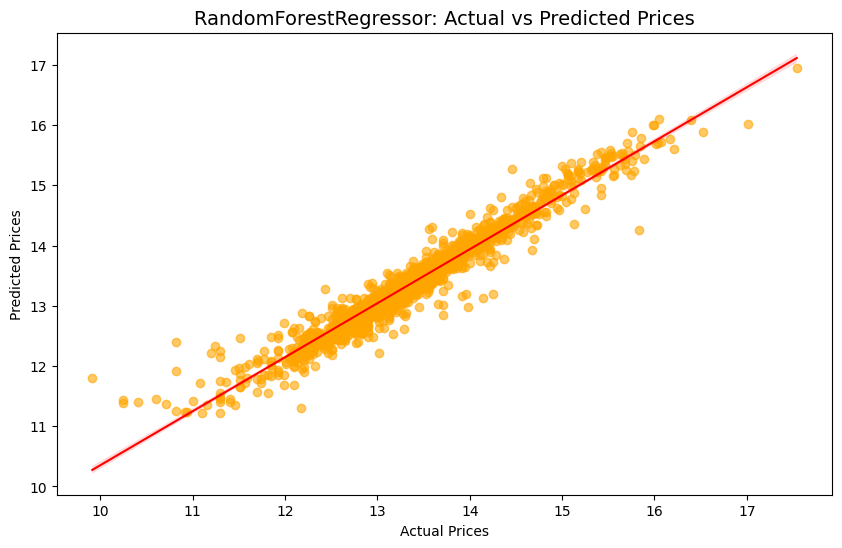

Trainscore: 0.9911275165155622
Testscore: 0.9383658688988351


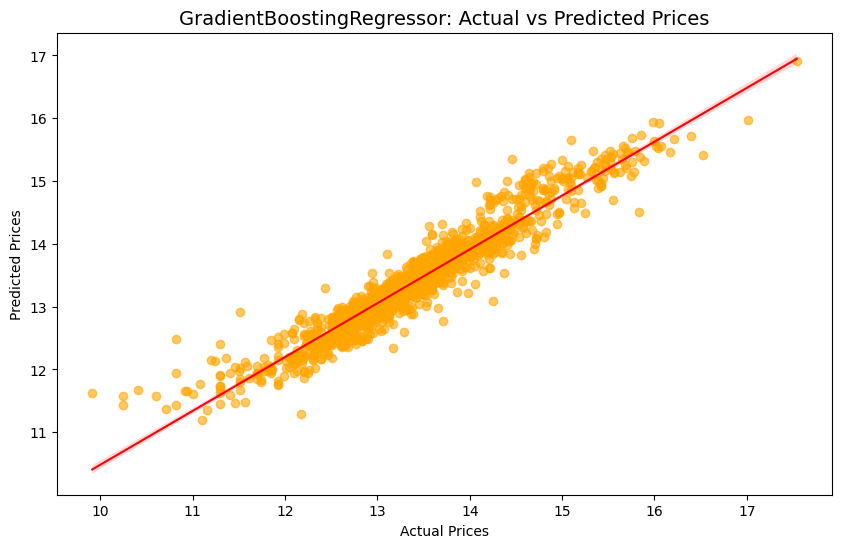

Trainscore: 0.9272276126033723
Testscore: 0.9127325353604538


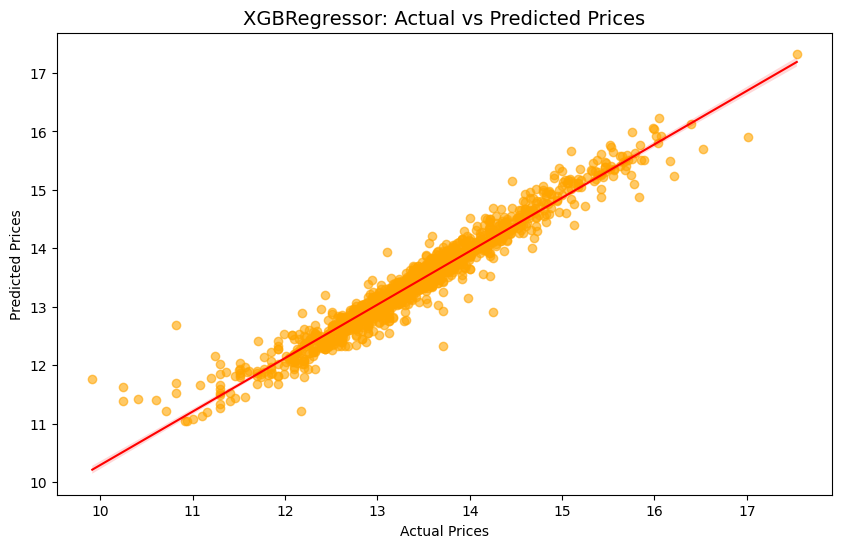

Trainscore: 0.9775929821857244
Testscore: 0.9429541228382814


,model,MAE,MSE,RMSE,R2
0,LinearRegression,1.192621e+12,1.923014e+26,1.386728e+13,-2.571360e+26
1,DecisionTreeRegressor,1.757384e-01,7.296618e-02,2.701225e-01,9.024332e-01
2,RandomForestRegressor,1.352412e-01,4.609362e-02,2.146942e-01,9.383659e-01
3,GradientBoostingRegressor,1.774234e-01,6.526373e-02,2.554677e-01,9.127325e-01
4,XGBRegressor,1.341480e-01,4.266225e-02,2.065484e-01,9.429541e-01


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor


# using above custom function to identify the best algorithm

models = [LinearRegression, DecisionTreeRegressor, RandomForestRegressor,GradientBoostingRegressor, XGBRegressor]

results = best_ML_model(x_scaled,Y, models)
results

Tuning XGB Regressor and Random Forest Regressor using Randomized Search CV

In [13]:
from sklearn.model_selection import RandomizedSearchCV

X_train, X_test, Y_train, Y_test = train_test_split(x_scaled, Y, test_size=0.20, random_state=42)
xgb_regressor = XGBRegressor()

param_grid = {
    'alpha': [0, 0.1, 0.5, 1, 5],  
    'lambda': [0, 0.1, 0.5, 1, 5],
    'n_estimators': [100, 200, 300],  
    'learning_rate': [0.05, 0.1, 0.2],  
    'max_depth': [3, 6, 9], 
    'subsample': [0.7, 0.8, 1.0], 
    'colsample_bytree': [0.7, 0.8, 1.0]  
}

# Using RandomizedSearchCV to tune hyperparameters
random_search = RandomizedSearchCV(
    estimator=xgb_regressor,
    param_distributions=param_grid,
    cv=10,
    n_jobs=-1
)

random_search.fit(X_train, Y_train)

# Print best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.05, 'lambda': 5, 'colsample_bytree': 0.8, 'alpha': 0}
Best Score: 0.9491220722279357


In [ ]:
rf_regressor = RandomForestRegressor()

param_grid_rf = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [0.5, 0.8],
    'n_estimators': [100, 200, 300]
}

random_search_rf = RandomizedSearchCV(estimator=rf_regressor, 
                                      param_distributions=param_grid_rf,
                                      cv=10, 
                                      n_jobs=-1,
                                      random_state=42)

# Fit the RandomizedSearchCV model
random_search_rf.fit(X_train, Y_train)

# Best hyperparameters and score
print("Best Parameters for RandomForestRegressor:", random_search_rf.best_params_)
print("Best Score for RandomForestRegressor:", random_search_rf.best_score_)

Evaluating Tuned Parameters for both Models

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# final model RandomForestRegresso fit and prediction
rf_param = {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 0.5, 'max_depth': 40}
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
final_model_rf = RandomForestRegressor(**rf_param)

final_model_rf.fit(X_train,Y_train)

#Model evaluation
y_pred_fm_rf = final_model_rf.predict(X_test)
MSE_fm = mean_squared_error(Y_test,y_pred_fm_rf)
MAE_fm =mean_absolute_error(Y_test,y_pred_fm_rf)
RMSE_fm = np.sqrt(mean_squared_error(Y_test,y_pred_fm_rf))
r_squr_fm = r2_score(Y_test,y_pred_fm_rf)

print(f"Trainscore: {final_model_rf.score(X_train, Y_train)}")
print(f"Testscore: {final_model_rf.score(X_test, Y_test)}")

# create dataframe to view above evaluation metrics
rf_1=pd.DataFrame({"model":"RandomForestRegressor","MAE":[MAE_fm],"MSE":[MSE_fm],"RMSE":[RMSE_fm],"R2":r_squr_fm})
rf_1

Trainscore: 0.9786738228560785
Testscore: 0.9358260138778995


,model,MAE,MSE,RMSE,R2
0,RandomForestRegressor,0.138938,0.047993,0.219073,0.935826


In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# final model XGBRegrossor fit and prediction
X_train, X_test, Y_train, Y_test = train_test_split(x_scaled, Y, test_size=0.20)
xgb_params = {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.2, 'lambda': 0.1, 'colsample_bytree': 0.7, 'alpha': 0.5}
final_model_xbg =XGBRegressor(**xgb_params)

final_model_xbg.fit(X_train,Y_train)

#Model evaluation
y_pred_fm_xbg = final_model_xbg.predict(X_test)
MSE_fm = mean_squared_error(Y_test,y_pred_fm_xbg)
MAE_fm =mean_absolute_error(Y_test,y_pred_fm_xbg)
RMSE_fm = np.sqrt(mean_squared_error(Y_test,y_pred_fm_xbg))
r_squr_fm = r2_score(Y_test,y_pred_fm_xbg)

print(f"Trainscore: {final_model_xbg.score(X_train, Y_train)}")
print(f"Testscore: {final_model_xbg.score(X_test, Y_test)}")

# create dataframe to view above evaluation metrics
xbg_1=pd.DataFrame({"model":"XGBRegressor","MAE":[MAE_fm],"MSE":[MSE_fm],"RMSE":[RMSE_fm],"R2":r_squr_fm})
xbg_1

Trainscore: 0.9869112282477867
Testscore: 0.9544249275240201


,model,MAE,MSE,RMSE,R2
0,XGBRegressor,0.118366,0.033442,0.182871,0.954425


In [ ]:
important_features = [
    'City', 'Body_Type', 'Ownerno', 'Company', 'Model', 'Modelyear', 'Price', 'Registration_Year', 
    'Insurance_Validity', 'Fuel_Type', 'Variantname','Seats', 'Kms_Driven', 'Transmission', 'Year_Of_Manufacture', 
    'Engine', 'Mileage', 'Age_Old_In_Year'
                      ]

final_columns = [column for column in df.columns if column in important_features]
drop_columns = [column for column in df.columns if column not in important_features]
df_copy = df.copy()
df_copy = df_copy.drop(columns=drop_columns)
df_copy.to_csv('final_cars_data_for_ml.csv', index=False)
print(final_columns)

['City', 'Body_Type', 'Ownerno', 'Company', 'Model', 'Modelyear', 'Variantname', 'Price', 'Registration_Year', 'Insurance_Validity', 'Fuel_Type', 'Seats', 'Kms_Driven', 'Transmission', 'Year_Of_Manufacture', 'Engine', 'Mileage', 'Age_Old_In_Year']


In [ ]:
df = pd.read_csv('final_cars_data_for_ml.csv')
df.head()

,City,Body_Type,Ownerno,Company,Model,Modelyear,Variantname,Price,Registration_Year,Insurance_Validity,Fuel_Type,Seats,Kms_Driven,Transmission,Year_Of_Manufacture,Engine,Mileage,Age_Old_In_Year
0,chennai,SUV,1,Kia,Sonet,2022,Turbo DCT,13.955273,2022,Third Party,Petrol,5,20000,Automatic,2022,998,18.30,2
1,chennai,Minivans,1,Maruti,Eeco,2015,7 Seater,12.936034,2015,Comprehensive,Petrol,7,20687,Manual,2015,1196,15.37,9
2,chennai,SUV,1,Nissan,Magnite,2021,Turbo XV,13.527828,2021,Third Party,Petrol,5,30000,Manual,2021,999,20.00,3
3,chennai,Hatchback,1,Hyundai,i10,2015,Sportz,12.894207,2015,Comprehensive,Petrol,5,59247,Manual,2015,1086,19.81,9
4,chennai,Hatchback,1,Honda,Jazz,2015,1.2 VX,13.217674,2015,Third Party,Petrol,5,50000,Manual,2015,1199,18.70,9


In [ ]:
X = df.drop(["Price"], axis=1)
Y = df["Price"]

Creating Pipeline for Deploy

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=42)

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# Preprocessing for numeric features
numeric_transformer = Pipeline(steps=[ # Handle missing values
    ('scaler', StandardScaler())                 # Standardize numeric features
])

# Preprocessing for categorical features
categorical_transformer = Pipeline(steps=[ # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))     # One-hot encode categorical features
])

# Combine preprocessors in a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

preprocessor.fit(x_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 Index(['Ownerno', 'Modelyear', 'Registration_Year', 'Seats', 'Kms_Driven',
       'Year_Of_Manufacture', 'Engine', 'Mileage', 'Age_Old_In_Year'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['City', 'Body_Type', 'Company', 'Model', 'Variantname',
       'Insurance_Validity', 'Fuel_Type', 'Transmission'],
      dtype='object'))])

In [ ]:
pipeline=Pipeline([("preprocessing",preprocessor),
                   ("model",final_model_xbg)])
pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Ownerno', 'Modelyear', 'Registration_Year', 'Seats', 'Kms_Driven',
       'Year_Of_Manufacture', 'Engine', 'Mileage', 'Age_Old_In_Year'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Ci...
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, lambda=0.1,
                              learning_rate=0.2, max_bin=None,
                              max_cat_threshold=None, max_cat_to_onehot=None,
                              max_delta_step=None, max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=300, n_jobs=None, ...))])

In [ ]:
pipeline.fit(x_train, y_train)
y_prediction = pipeline.predict(x_test)

In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    return pd.DataFrame({
        "Model": [model_name],
        "MAE": [mean_absolute_error(y_true, y_pred)],
        "MSE": [mean_squared_error(y_true, y_pred)],
        "RMSE": [np.sqrt(mean_squared_error(y_true, y_pred))],
        "R2": [r2_score(y_true, y_pred)]
    })

# Evaluate the pipeline
results = evaluate_model(y_test, y_prediction, "XGBoost Regressor")
results

,Model,MAE,MSE,RMSE,R2
0,XGBoost Regressor,0.119851,0.034365,0.185378,0.952771


In [ ]:
import joblib

# Saving the final model
joblib.dump(final_model_xbg, 'trained_model.pkl')

['trained_model.pkl']